In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
plt.rcParams['figure.figsize'] = (7, 5)

## Loading the dataset

In [81]:
TRAIN_DIR = '../input/gdsc-nu-datathon-jusan-bank-case-competition/train_data.csv'
df = pd.read_csv(TRAIN_DIR)
df

,client_id,cato_code,gender,country,citizenship,age_days,client_days,opsos_code,phone_digits,max_dup,...,salary_10,transfers_amount_in_8,transfers_count_in_8,transfers_amount_out_8,transfers_count_out_8,transactions_amount_8,transactions_count_8,auth_count_8,salary_8,label
0,2152686,17.0,1.0,0.0,0.0,11643.0,130.0,9.0,5.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1712777,2.0,NaN,0.0,0.0,18095.0,994.0,5.0,5.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,458915,NaN,0.0,0.0,0.0,7955.0,1144.0,7.0,5.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0.037251,0.033580,0.03358,NaN,0
3,530220,NaN,0.0,0.0,0.0,22580.0,847.0,0.0,6.0,1.0,...,0.036560,NaN,NaN,NaN,NaN,0.115086,0.033581,0.03358,0.092161,0
4,1103654,12.0,0.0,0.0,0.0,13107.0,547.0,12.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941526,1244050,6.0,1.0,0.0,0.0,11813.0,462.0,8.0,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
941527,1142266,12.0,0.0,0.0,0.0,11573.0,787.0,8.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
941528,1327217,9.0,1.0,0.0,0.0,11268.0,455.0,11.0,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03358,NaN,0
941529,1634056,5.0,1.0,0.0,NaN,17215.0,400.0,10.0,4.0,1.0,...,0.038471,NaN,NaN,NaN,NaN,0.041267,0.033580,0.03358,0.037430,0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941531 entries, 0 to 941530
Data columns (total 48 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   client_id                941531 non-null  int64  
 1   cato_code                736732 non-null  float64
 2   gender                   870421 non-null  float64
 3   country                  857321 non-null  float64
 4   citizenship              645816 non-null  float64
 5   age_days                 936053 non-null  float64
 6   client_days              937166 non-null  float64
 7   opsos_code               925714 non-null  float64
 8   phone_digits             925714 non-null  float64
 9   max_dup                  925714 non-null  float64
 10  monthly_installment      503229 non-null  float64
 11  date_close               32329 non-null   object 
 12  deposit_sum_KZT          90525 non-null   float64
 13  deposit_sum_USD          90525 non-null   float64
 14  depo

In [83]:
df.describe()

,client_id,cato_code,gender,country,citizenship,age_days,client_days,opsos_code,phone_digits,max_dup,...,salary_10,transfers_amount_in_8,transfers_count_in_8,transfers_amount_out_8,transfers_count_out_8,transactions_amount_8,transactions_count_8,auth_count_8,salary_8,label
count,9.415310e+05,736732.000000,870421.000000,857321.000000,645816.000000,936053.000000,937166.000000,925714.000000,925714.000000,925714.000000,...,110996.000000,0.0,0.0,0.0,0.0,374804.000000,374804.000000,483457.000000,101332.000000,941531.000000
mean,1.559629e+06,8.536510,0.519033,0.032302,0.121451,13450.740881,946.595329,6.661014,5.012386,1.104161,...,0.047598,NaN,NaN,NaN,NaN,0.081293,0.033581,0.033580,0.047930,0.013354
std,1.043782e+06,5.799225,0.499638,1.043668,1.809480,4916.583205,968.524819,3.752486,0.952125,0.443487,...,0.030450,NaN,NaN,NaN,NaN,0.416487,0.000003,0.000001,0.034323,0.114784
min,0.000000e+00,1.000000,0.000000,0.000000,0.000000,346.000000,5.000000,0.000000,1.000000,0.000000,...,0.033579,NaN,NaN,NaN,NaN,0.033579,0.033580,0.033580,0.033579,0.000000
25%,7.915145e+05,4.000000,0.000000,0.000000,0.000000,9599.000000,280.000000,4.000000,4.000000,1.000000,...,0.037480,NaN,NaN,NaN,NaN,0.037359,0.033580,0.033580,0.037743,0.000000
50%,1.389183e+06,8.000000,1.000000,0.000000,0.000000,12570.000000,591.000000,7.000000,5.000000,1.000000,...,0.042821,NaN,NaN,NaN,NaN,0.045149,0.033580,0.033580,0.043111,0.000000
75%,2.087383e+06,13.000000,1.000000,0.000000,0.000000,16559.000000,1172.000000,10.000000,6.000000,1.000000,...,0.050173,NaN,NaN,NaN,NaN,0.064689,0.033580,0.033580,0.050228,0.000000
max,4.455984e+06,20.000000,1.000000,120.000000,145.000000,47349.000000,8450.000000,84.000000,7.000000,3.000000,...,2.831230,NaN,NaN,NaN,NaN,95.587475,0.034451,0.033653,3.789647,1.000000


## Exploratory Data Analysis

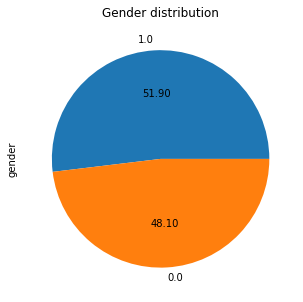

In [84]:
plt.title('Gender distribution')
df['gender'].value_counts().plot(kind='pie', autopct="%.2f")
plt.show()

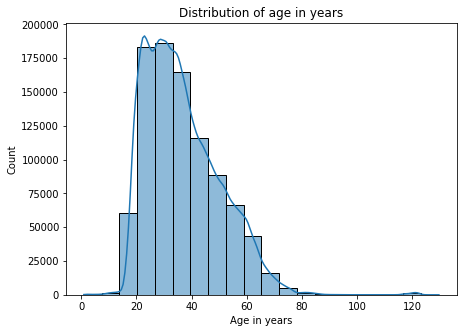

In [85]:
plt.title('Distribution of age in years')
sns.histplot(x=df['age_days'] / 365, data=df, bins=20, kde=True)
plt.xlabel('Age in years')
plt.show()

[]

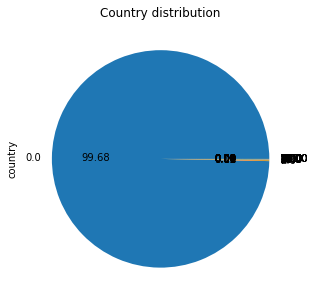

In [86]:
plt.title('Country distribution')
df['country'].value_counts().plot(kind='pie', autopct="%.2f")
plt.plot()

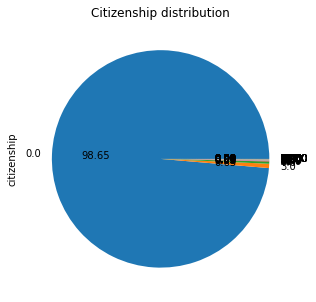

In [87]:
plt.title('Citizenship distribution')
df['citizenship'].value_counts().plot(kind='pie', autopct="%.2f")
plt.show()

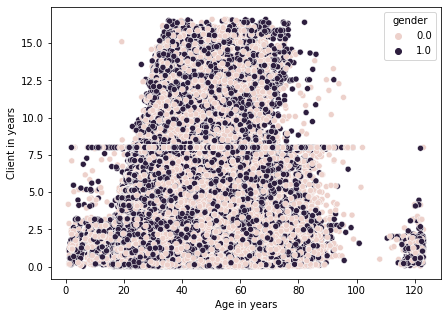

In [88]:
sns.scatterplot(x=df['age_days'] / 365, y=df['client_days'] / 365, hue='gender', data=df)
plt.xlabel('Age in years')
plt.ylabel('Client in years')
plt.show()

In [89]:
df.columns

Index(['client_id', 'cato_code', 'gender', 'country', 'citizenship',
       'age_days', 'client_days', 'opsos_code', 'phone_digits', 'max_dup',
       'monthly_installment', 'date_close', 'deposit_sum_KZT',
       'deposit_sum_USD', 'deposit_sum_EUR', 'deal_sum_kzt_express',
       'expired_day_express', 'deal_start_date_express',
       'plan_end_date_express', 'deal_sum_kzt_product', 'expired_day_product',
       'deal_start_date_product', 'plan_end_date_product',
       'transfers_amount_in_9', 'transfers_count_in_9',
       'transfers_amount_out_9', 'transfers_count_out_9',
       'transactions_amount_9', 'transactions_count_9', 'auth_count_9',
       'salary_9', 'transfers_amount_in_10', 'transfers_count_in_10',
       'transfers_amount_out_10', 'transfers_count_out_10',
       'transactions_amount_10', 'transactions_count_10', 'auth_count_10',
       'salary_10', 'transfers_amount_in_8', 'transfers_count_in_8',
       'transfers_amount_out_8', 'transfers_count_out_8',
       'tra

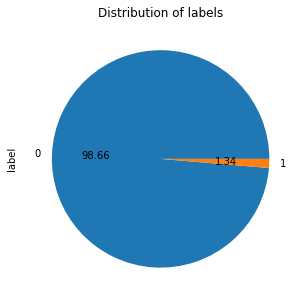

In [90]:
plt.title('Distribution of labels')
df['label'].value_counts().plot(kind='pie', autopct="%.2f")
plt.show()

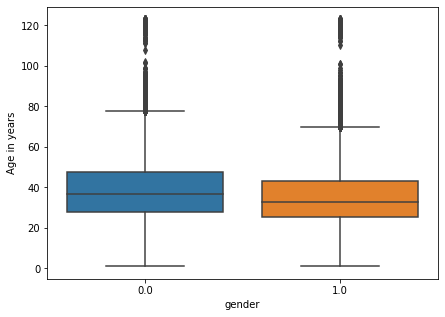

In [92]:
sns.boxplot(x='gender', y=df['age_days'] / 365, data=df)
plt.ylabel('Age in years')
plt.show()

### Deleting unnecessary features (columns)

In [93]:
DELETE_COLS = ['transactions_amount_9', 'transactions_count_9', 'transactions_amount_10', 'transactions_count_10',
               'transfers_amount_in_8', 'transfers_count_in_8', 'transfers_amount_out_8', 'transfers_count_out_8',
               'opsos_code', 'phone_digits', 'max_dup']

# The above mentioned columns have all rows filled with NaN values, thus they carry no information about the data.
df.drop(columns=DELETE_COLS, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941531 entries, 0 to 941530
Data columns (total 37 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   client_id                941531 non-null  int64  
 1   cato_code                736732 non-null  float64
 2   gender                   870421 non-null  float64
 3   country                  857321 non-null  float64
 4   citizenship              645816 non-null  float64
 5   age_days                 936053 non-null  float64
 6   client_days              937166 non-null  float64
 7   monthly_installment      503229 non-null  float64
 8   date_close               32329 non-null   object 
 9   deposit_sum_KZT          90525 non-null   float64
 10  deposit_sum_USD          90525 non-null   float64
 11  deposit_sum_EUR          90525 non-null   float64
 12  deal_sum_kzt_express     158439 non-null  float64
 13  expired_day_express      158439 non-null  float64
 14  deal

Are there any customers whose number of days they expired their express loans (col `expired_day_express`) is larger than the difference between today's date and the date they first have taken express loans? Let's check that!

In [94]:
# converting the date column to datetime data type.
df['deal_start_date_express'] = pd.to_datetime(df['deal_start_date_express'])

In [95]:
today = np.datetime64(date.today())

# difference (in days) between today's date and the first express loan date. Then taking the difference of this number and
# the number of days the loan was expired.
df['express_loan_date_diff'] = (today - df['deal_start_date_express']).dt.days - df['expired_day_express']

# checking if there are rows that have negative difference. It implies that customers have expired their loans for more days
# than it has passed since their first loan till today.
df[(~df['express_loan_date_diff'].isna()) & (df['express_loan_date_diff'] < 0)]

,client_id,cato_code,gender,country,citizenship,age_days,client_days,monthly_installment,date_close,deposit_sum_KZT,...,transfers_amount_out_10,transfers_count_out_10,auth_count_10,salary_10,transactions_amount_8,transactions_count_8,auth_count_8,salary_8,label,express_loan_date_diff
501,1788663,18.0,1.0,0.0,NaN,6761.0,417.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-110.0
541,2238993,8.0,1.0,NaN,NaN,8873.0,301.0,0.124966,NaN,NaN,...,NaN,NaN,0.03358,NaN,0.050665,0.033580,0.033581,NaN,0,-56.0
763,1565438,16.0,0.0,0.0,NaN,12293.0,415.0,0.037501,NaN,NaN,...,NaN,NaN,NaN,NaN,0.038945,0.033581,0.033580,NaN,1,-23.0
1217,1794078,5.0,1.0,NaN,NaN,13273.0,337.0,0.053950,2026-12-01,NaN,...,NaN,NaN,NaN,NaN,0.033580,0.033580,NaN,NaN,0,-277.0
1714,1958584,12.0,1.0,NaN,NaN,12756.0,292.0,0.043239,NaN,NaN,...,NaN,NaN,0.03358,NaN,NaN,NaN,NaN,NaN,0,-122.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940413,726554,1.0,1.0,0.0,NaN,11563.0,354.0,0.062039,NaN,NaN,...,NaN,NaN,0.03358,NaN,NaN,NaN,0.033580,NaN,0,-77.0
940823,1701435,18.0,1.0,0.0,NaN,8591.0,318.0,0.039088,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.033580,NaN,0,-1760.0
940906,2110844,4.0,1.0,0.0,0.0,7081.0,185.0,0.090788,NaN,NaN,...,NaN,NaN,0.03358,NaN,0.148907,0.033585,0.033583,NaN,0,-194.0
941146,2120669,12.0,0.0,0.0,NaN,10572.0,370.0,0.061584,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.033580,NaN,0,-212.0


Well, the above rows should be dropped, as it is not possible that a customer has expired their loan for longer than it has passed since their first loan until today.

In [96]:
negative_diff_rows = df[(~df['express_loan_date_diff'].isna()) & (df['express_loan_date_diff'] < 0)].index
df = df.drop(labels=negative_diff_rows, axis=0)

# after sorting the correct values, I do not need the "express_loan_date_diff" column anymore, so I can drop it.
df.drop(columns=['express_loan_date_diff'], inplace=True)

Now, I need to do the same operation for `expired_day_product` and `deal_start_date_product` columns.

In [97]:
# converting the date column to datetime data type.
df['deal_start_date_product'] = pd.to_datetime(df['deal_start_date_product'])

In [98]:
today = np.datetime64(date.today())

# difference (in days) between today's date and the first express loan date. Then taking the difference of this number and
# the number of days the loan was expired.
df['product_loan_date_diff'] = (today - df['deal_start_date_product']).dt.days - df['expired_day_product']

# checking if there are rows that have negative difference. It implies that customers have expired their loans for more days
# than it has passed since their first loan till today.
df[(~df['product_loan_date_diff'].isna()) & (df['product_loan_date_diff'] < 0)]

,client_id,cato_code,gender,country,citizenship,age_days,client_days,monthly_installment,date_close,deposit_sum_KZT,...,transfers_amount_out_10,transfers_count_out_10,auth_count_10,salary_10,transactions_amount_8,transactions_count_8,auth_count_8,salary_8,label,product_loan_date_diff
298,2284430,NaN,0.0,0.0,NaN,18074.0,207.0,0.042087,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-115.0
1017,2283187,14.0,1.0,0.0,NaN,15057.0,268.0,0.037427,NaN,NaN,...,NaN,NaN,0.03358,NaN,0.058803,0.033581,0.033580,NaN,0,-75.0
1092,798116,NaN,1.0,0.0,0.0,13094.0,1641.0,0.051421,2026-03-01,NaN,...,NaN,NaN,0.03358,NaN,0.047711,0.033580,0.033582,NaN,0,-40.0
1301,2213323,NaN,1.0,0.0,NaN,14887.0,211.0,0.044200,NaN,NaN,...,NaN,NaN,0.03358,NaN,NaN,NaN,NaN,NaN,0,-143.0
2213,2230096,NaN,1.0,0.0,NaN,22961.0,206.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939102,2514991,18.0,0.0,0.0,NaN,17599.0,206.0,0.035192,2027-05-01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.033580,NaN,0,-838.0
939116,1858454,11.0,1.0,NaN,NaN,7438.0,311.0,0.078491,NaN,NaN,...,NaN,NaN,0.03358,NaN,NaN,NaN,0.033580,NaN,0,-29.0
939535,2327497,1.0,1.0,NaN,NaN,11353.0,293.0,0.087716,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.033580,NaN,1,-272.0
939857,2441066,6.0,1.0,0.0,NaN,15974.0,234.0,0.034042,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-347.0


In [99]:
negative_diff_rows = df[(~df['product_loan_date_diff'].isna()) & (df['product_loan_date_diff'] < 0)].index
df = df.drop(labels=negative_diff_rows, axis=0)

# after sorting the correct values, I do not need the "express_loan_date_diff" column anymore, so I can drop it.
df.drop(columns=['product_loan_date_diff'], inplace=True)

In [100]:
# What is more, what if a customer's age (in days) is smaller than the number of days he/she is a client of the bank?
# I should drop such rows...
df['client_age_diff'] = df['age_days'] - df['client_days']
df[df['client_age_diff'] < 0]

,client_id,cato_code,gender,country,citizenship,age_days,client_days,monthly_installment,date_close,deposit_sum_KZT,...,transfers_amount_out_10,transfers_count_out_10,auth_count_10,salary_10,transactions_amount_8,transactions_count_8,auth_count_8,salary_8,label,client_age_diff
22168,238841,NaN,0.0,0.0,0.0,1618.0,1884.0,0.038291,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.033580,NaN,0,-266.0
66714,1609364,1.0,0.0,0.0,NaN,385.0,389.0,NaN,NaN,NaN,...,0.044430,0.03358,0.033580,0.041727,0.042052,0.033580,0.033580,0.036614,0,-4.0
68263,1349918,10.0,1.0,0.0,0.0,2219.0,2508.0,0.040249,NaN,NaN,...,0.033878,0.03358,0.033580,0.085259,0.139466,0.033580,0.033580,0.087358,0,-289.0
68846,488294,NaN,0.0,0.0,0.0,744.0,907.0,0.038040,NaN,NaN,...,0.035905,0.03358,0.033580,NaN,0.055892,0.033580,0.033580,0.039019,0,-163.0
86123,799595,4.0,1.0,0.0,0.0,1558.0,1631.0,0.042165,NaN,NaN,...,0.060492,0.03358,0.033581,0.049734,0.055552,0.033580,0.033580,0.044582,0,-73.0
182764,146163,1.0,0.0,0.0,0.0,774.0,2591.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1817.0
209499,109362,4.0,1.0,0.0,0.0,1130.0,2919.0,NaN,NaN,NaN,...,0.034772,0.03358,0.033580,0.049490,0.066357,0.033580,0.033580,0.043999,0,-1789.0
251928,310797,5.0,0.0,0.0,0.0,1128.0,2919.0,0.061639,NaN,0.033878,...,0.045909,0.03358,0.033580,NaN,0.066097,0.033580,0.033580,NaN,0,-1791.0
279071,1444818,3.0,0.0,0.0,0.0,437.0,1057.0,NaN,NaN,NaN,...,0.033618,0.03358,0.033581,0.038831,0.069380,0.033581,0.033582,0.049806,0,-620.0
292034,342328,NaN,0.0,0.0,0.0,2741.0,2919.0,0.043930,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.033580,NaN,0,-178.0


In [101]:
# Well... I am dropping these rows...
negative_diff_rows = df[df['client_age_diff'] < 0].index

df.drop(labels=negative_diff_rows, axis=0, inplace=True)
df.drop(columns=['client_age_diff'], inplace=True)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 937226 entries, 0 to 941530
Data columns (total 37 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   client_id                937226 non-null  int64         
 1   cato_code                732745 non-null  float64       
 2   gender                   866435 non-null  float64       
 3   country                  853309 non-null  float64       
 4   citizenship              644230 non-null  float64       
 5   age_days                 931753 non-null  float64       
 6   client_days              932863 non-null  float64       
 7   monthly_installment      499562 non-null  float64       
 8   date_close               31700 non-null   object        
 9   deposit_sum_KZT          90472 non-null   float64       
 10  deposit_sum_USD          90472 non-null   float64       
 11  deposit_sum_EUR          90472 non-null   float64       
 12  deal_sum_kzt_exp

Continuing working with the dates...

In [103]:
df[~df['deal_start_date_express'].isna()][['deal_start_date_express', 'plan_end_date_express']]

,deal_start_date_express,plan_end_date_express
11,2020-01-09,2027-01-09
12,2021-02-05,2026-02-05
16,2018-08-09,2023-02-09
26,2022-01-25,2024-01-25
27,2019-08-02,2025-08-02
...,...,...
941474,2019-09-13,2024-09-13
941488,2022-01-25,2023-07-25
941494,2022-08-08,2025-08-08
941505,2022-08-15,2023-08-15


If customers have non-nan rows in the `deal_start_date_express` (with meaning "дата открытия самого раннего займа") and/or `plan_end_date_express` ("ожидаемая дата закрытия займа") columns, it means that they **have taken loan(-s)**, while others have not.

In [104]:
# That is why I can create another column named "has_taken_loan", which states whether a customer has taken a loan.
df['has_taken_loan'] = 0

non_nan_rows = df[(~df['deal_start_date_express'].isna()) & (~df['plan_end_date_express'].isna())].index
df.loc[non_nan_rows, 'has_taken_loan'] = 1

# Since I have indicated rows where a customer has taken a loan as 1, I can drop columns that indicate its date.
df.drop(columns=['deal_start_date_express', 'plan_end_date_express'], inplace=True)

In [105]:
df['has_taken_loan'].value_counts()

0    781791
1    155435
Name: has_taken_loan, dtype: int64

In [106]:
# Moreover, I can specify whether a customer had had a deposit and whether they have closed it by the "date_close" column.
df['has_closed_deposit'] = 0

non_nan_rows = df[~df['date_close'].isna()].index
df.loc[non_nan_rows, 'has_closed_deposit'] = 1

df.drop(columns=['date_close'], inplace=True)

In [107]:
df['has_closed_deposit'].value_counts()

0    905526
1     31700
Name: has_closed_deposit, dtype: int64

The very same logic, as was used in the last 2 cases, can be applied to columns `deal_start_date_product` ("дата открытия самого раннего товарного займа") and `plan_end_date_product` ("ожидаемая дата закрытия последнего товарного займа").

In [108]:
df['has_taken_product_loan'] = 0

non_nan_rows = df[(~df['deal_start_date_product'].isna()) & (~df['plan_end_date_product'].isna())].index
df.loc[non_nan_rows, 'has_taken_product_loan'] = 1

df.drop(columns=['deal_start_date_product', 'plan_end_date_product'], inplace=True)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 937226 entries, 0 to 941530
Data columns (total 35 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   client_id                937226 non-null  int64  
 1   cato_code                732745 non-null  float64
 2   gender                   866435 non-null  float64
 3   country                  853309 non-null  float64
 4   citizenship              644230 non-null  float64
 5   age_days                 931753 non-null  float64
 6   client_days              932863 non-null  float64
 7   monthly_installment      499562 non-null  float64
 8   deposit_sum_KZT          90472 non-null   float64
 9   deposit_sum_USD          90472 non-null   float64
 10  deposit_sum_EUR          90472 non-null   float64
 11  deal_sum_kzt_express     155435 non-null  float64
 12  expired_day_express      155435 non-null  float64
 13  deal_sum_kzt_product     76027 non-null   float64
 14  expi

If a customer has a non-null value in either `expired_day_express` or `expired_day_product`, then it means that they have expired their loans.

In [153]:
df['has_expired_express'] = 0
df.loc[df['expired_day_express'] > 0, 'has_expired_express'] = 1

df['has_expired_product'] = 0
df.loc[df['expired_day_product'] > 0, 'has_expired_product'] = 1

### Handling NaN values

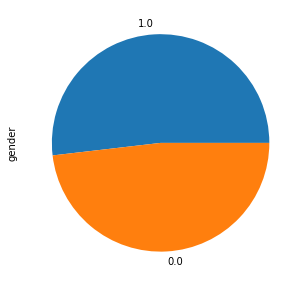

In [113]:
df['gender'].value_counts().plot(kind='pie')
plt.show()

In [114]:
# There are less women than men in this dataset. I believe I can replace NaN values with 0 in the "gender" column...
df.fillna(value={ 'gender' : 0 }, inplace=True)

In [115]:
# "expired_day_expenses" column stands for "кол-во дней просрочки платежей по экспресс кредитам", but those NaN
# values imply that a customer either has not expired his/her loan or has not even taken a loan, so these values
# are set to 0. The same logic applies to the "deal_sum_kzt_express" column.
df.fillna(value={ 'deal_sum_kzt_express' : 0, 'expired_day_express' : 0 }, inplace=True)

In [116]:
# columns "deposit_sum_KZT", "deposit_sum_USD", and "deposit_sum_EUR" have NaN values possibly because
# those customers do not have a deposit, so their sum can be set to 0.
df.fillna(value={
    'deposit_sum_KZT' : 0,
    'deposit_sum_USD' : 0,
    'deposit_sum_EUR' : 0
}, inplace=True)

In [117]:
df.fillna(value={
    'deal_sum_kzt_product' : 0,
    'expired_day_product' : 0
}, inplace=True)

Columns `transfers_amount_in_X`, `transfers_amount_out_X`, `transfers_count_in_X`, and `transfers_count_out_X` may have NaN values just because during months X those customers did not have any transfer operations in nor out. So these NaN rows can be set to 0.

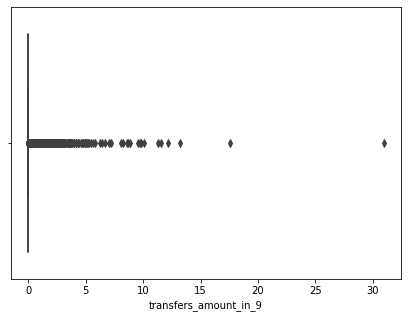

In [118]:
sns.boxplot(x='transfers_amount_in_9', data=df)
plt.show()

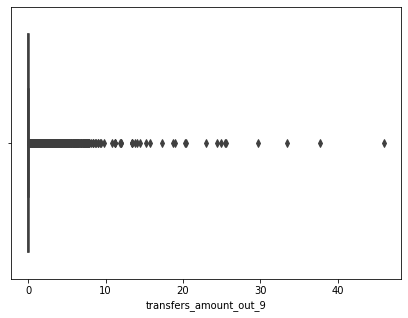

In [119]:
sns.boxplot(x='transfers_amount_out_9', data=df)
plt.show()

In [121]:
for i in [9, 10]:
    print(f"transfers_amount_in_{i} MEAN:", df[f'transfers_amount_in_{i}'].mean())
    print(f"transfers_amount_in_{i} MEDIAN:", df[f'transfers_amount_in_{i}'].median())
    print(f"transfers_amount_out_{i} MEAN:", df[f'transfers_amount_out_{i}'].mean())
    print(f"transfers_amount_out_{i} MEDIAN:", df[f'transfers_amount_out_{i}'].median())
    print(f"transfers_count_in_{i} MEAN:", df[f'transfers_count_in_{i}'].mean())
    print(f"transfers_count_out_{i} MEDIAN:", df[f'transfers_count_out_{i}'].median())

transfers_amount_in_9 MEAN: 0.04279230816608358
transfers_amount_in_9 MEDIAN: 0.0335794596310354
transfers_amount_out_9 MEAN: 0.06503143931947042
transfers_amount_out_9 MEDIAN: 0.0367989457507878
transfers_count_in_9 MEAN: 0.033579515744871564
transfers_count_out_9 MEDIAN: 0.033579578871262
transfers_amount_in_10 MEAN: 0.04274225304250778
transfers_amount_in_10 MEDIAN: 0.0335794596310354
transfers_amount_out_10 MEAN: 0.06173239769149976
transfers_amount_out_10 MEDIAN: 0.0366200854108016
transfers_count_in_10 MEAN: 0.033579516632255495
transfers_count_out_10 MEDIAN: 0.0335796384913753


It may be the case that MEAN values are larger than MEDIAN values because of the outlier values in the dataset. So I guess I should replace NaN values with the median value.

In [122]:
df.fillna(value={
    'transfers_amount_in_9' : df['transfers_amount_in_9'].median(),
    'transfers_count_in_9' : df['transfers_count_in_9'].median(),
    'transfers_amount_out_9' : df['transfers_amount_out_9'].median(),
    'transfers_count_out_9' : df['transfers_count_out_9'].median(),
    'transfers_amount_in_10' : df['transfers_amount_in_10'].median(),
    'transfers_count_in_10' : df['transfers_count_in_10'].median(),
    'transfers_amount_out_10' : df['transfers_amount_out_10'].median(),
    'transfers_count_out_10' : df['transfers_count_out_10'].median(),
}, inplace=True)

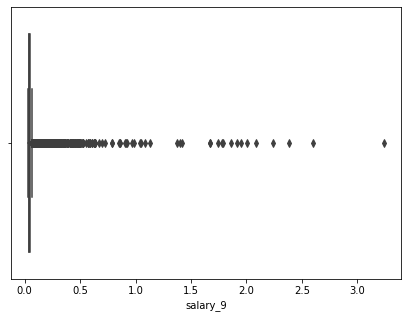

In [123]:
sns.boxplot(x='salary_9', data=df)
plt.show()

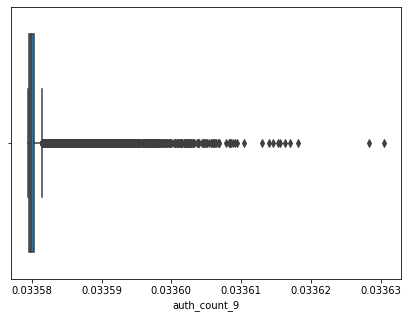

In [124]:
sns.boxplot(x='auth_count_9', data=df)
plt.show()

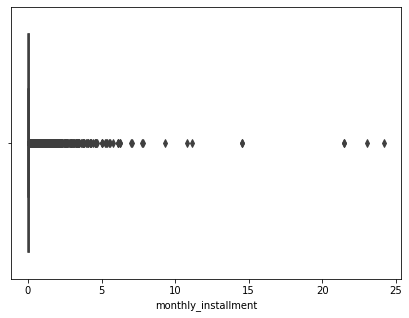

In [127]:
sns.boxplot(x='monthly_installment', data=df)
plt.show()

In [126]:
for i in [8, 9, 10]:
    print(f"auth_count_{i} MEAN:", df[f'auth_count_{i}'].mean())
    print(f"auth_count_{i} MEDIAN:", df[f'auth_count_{i}'].median())
    print(f"salary_{i} MEAN:", df[f'salary_{i}'].mean())
    print(f"salary_{i} MEDIAN:", df[f'salary_{i}'].median())

print("monthly_installment MEAN:", df['monthly_installment'].mean())
print("monthly_installment MEDIAN:", df['monthly_installment'].median())

auth_count_8 MEAN: 0.03358021750135927
auth_count_8 MEDIAN: 0.0335798769718287
salary_8 MEAN: 0.04793486219325019
salary_8 MEDIAN: 0.0431107482885626
auth_count_9 MEAN: 0.03358020252790732
auth_count_9 MEDIAN: 0.0335798173517153
salary_9 MEAN: 0.04713264454678545
salary_9 MEDIAN: 0.0425224766303478
auth_count_10 MEAN: 0.03358022116455235
auth_count_10 MEDIAN: 0.0335798173517153
salary_10 MEAN: 0.04760000047130556
salary_10 MEDIAN: 0.0428205771969915
monthly_installment MEAN: 0.04777827841242882
monthly_installment MEDIAN: 0.0403647352988104


The very same logic applies to all columns related to transactions, transfers, number of authorizations, salaries, etc.

In [128]:
df.fillna(value={
    'monthly_installment' : df['monthly_installment'].mean(),
    'auth_count_9' : df['auth_count_9'].mean(),
    'salary_9' : df['salary_9'].mean(),
    'auth_count_10' : df['auth_count_10'].mean(),
    'salary_10' : df['salary_10'].mean(),
    'transactions_amount_8' : df['transactions_amount_8'].mean(),
    'transactions_count_8' : df['transactions_count_8'].mean(),
    'auth_count_8' : df['auth_count_8'].mean(),
    'salary_8' : df['salary_8'].mean()
}, inplace=True)

I do not think that I can fill NaN values of the `cato_code` column, and this column may not influence the label, so I could drop this column.

In [129]:
df['cato_code'].unique()

array([17.,  2., nan, 12.,  8.,  4.,  1.,  5.,  6., 11., 10., 18., 16.,
       14.,  3., 13., 15.,  9.,  7., 19., 20.])

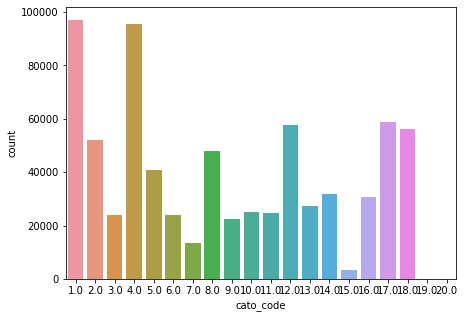

In [130]:
sns.countplot(x='cato_code', data=df)
plt.show()

In [131]:
df.drop(columns=['cato_code'], inplace=True)

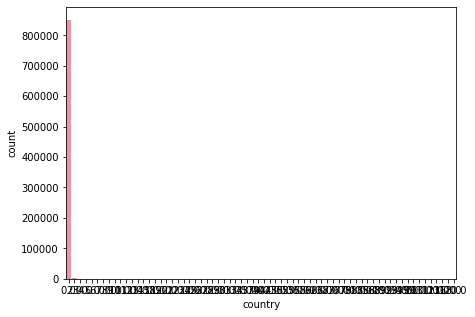

In [132]:
sns.countplot(x='country', data=df)
plt.show()

Most of the users (almost 800k) are from country categorized as 0. But since Jusan Bank is Kazakhstani bank, it might be concluded that country '0' is Kazakhstan.

In [133]:
# Filling missing values in the "country" column may not be quite correct, as we cannot guess customers' country, so I will
# just drop NaN rows.
df.dropna(subset=['country'], inplace=True)

In [134]:
df['country'].value_counts()

0.0     850537
2.0       1033
5.0        722
29.0       151
14.0       115
         ...  
94.0         1
99.0         1
31.0         1
88.0         1
92.0         1
Name: country, Length: 68, dtype: int64

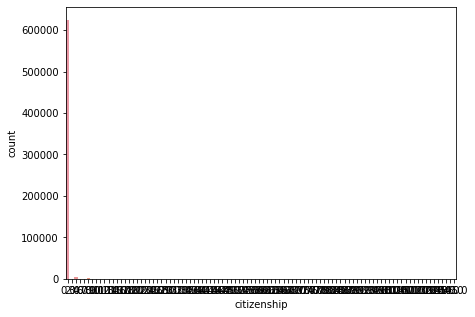

In [135]:
sns.countplot(x='citizenship', data=df)
plt.show()

Here 0 may also imply Kazakhstan as citizenship of customers. However, since there are more Kazakhstan values in the `country` column, than in the `citizenship` column, we can assume that NaN values also imply 0 (categorized Kazakhstan).

In [136]:
df.fillna(value={ 'citizenship' : 0 }, inplace=True)

In [137]:
df['citizenship'].value_counts()

0.0      844604
3.0        4095
7.0        2146
11.0        386
23.0        260
          ...  
45.0          1
145.0         1
134.0         1
96.0          1
91.0          1
Name: citizenship, Length: 96, dtype: int64

Now let's handle the age column of the dataset.

In [ ]:
# First, let's convert the age of customers to years.
df['age_years'] = df['age_days'] / 365
df.drop(columns=['age_days'], inplace=True)
df

In [145]:
df.fillna(value={ 'age_years' : df['age_years'].median() }, inplace=True)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 853309 entries, 0 to 941530
Data columns (total 34 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   client_id                853309 non-null  int64  
 1   gender                   853309 non-null  float64
 2   country                  853309 non-null  float64
 3   citizenship              853309 non-null  float64
 4   client_days              853309 non-null  float64
 5   monthly_installment      853309 non-null  float64
 6   deposit_sum_KZT          853309 non-null  float64
 7   deposit_sum_USD          853309 non-null  float64
 8   deposit_sum_EUR          853309 non-null  float64
 9   deal_sum_kzt_express     853309 non-null  float64
 10  expired_day_express      853309 non-null  float64
 11  deal_sum_kzt_product     853309 non-null  float64
 12  expired_day_product      853309 non-null  float64
 13  transfers_amount_in_9    853309 non-null  float64
 14  tran

### Handling outlier values

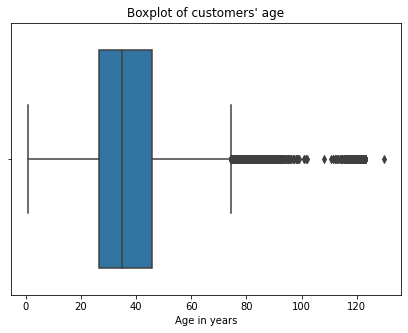

In [147]:
plt.title("Boxplot of customers' age")
sns.boxplot(x='age_years', data=df)
plt.xlabel('Age in years')
plt.show()

It can be seen that there are many outlier values of the age, so I should drop those rows. These include values that are older than 80 years old and younger that 16 years old. Moreover, I can exclude rows that contain NaN values from the `age_years` column.

In [148]:
df = df[(df['age_years'] >= 16) & (df['age_years'] <= 80)]

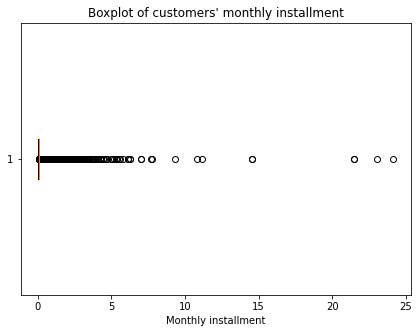

In [149]:
plt.title("Boxplot of customers' monthly installment")
plt.xlabel('Monthly installment')
plt.boxplot(x=df[~df['monthly_installment'].isna()]['monthly_installment'], vert=False)
plt.show()

In [150]:
# Deleting outlier values for "monthly_installment" column.
df = df[df['monthly_installment'] <= 5]

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847641 entries, 0 to 941530
Data columns (total 34 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   client_id                847641 non-null  int64  
 1   gender                   847641 non-null  float64
 2   country                  847641 non-null  float64
 3   citizenship              847641 non-null  float64
 4   client_days              847641 non-null  float64
 5   monthly_installment      847641 non-null  float64
 6   deposit_sum_KZT          847641 non-null  float64
 7   deposit_sum_USD          847641 non-null  float64
 8   deposit_sum_EUR          847641 non-null  float64
 9   deal_sum_kzt_express     847641 non-null  float64
 10  expired_day_express      847641 non-null  float64
 11  deal_sum_kzt_product     847641 non-null  float64
 12  expired_day_product      847641 non-null  float64
 13  transfers_amount_in_9    847641 non-null  float64
 14  tran

Here, many models have been used with the preproccessed dataset, however all of them performed really poorly so we excluded them from the notebook.